Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin cancer assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Skin cancer assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
            data_dir_train,
            seed=123,
            validation_split=0.2,
            subset="training",
            image_size=(img_height,img_width),
            batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
            data_dir_train,
            seed=123,
            validation_split=0.2,
            subset="validation",
            image_size=(img_height,img_width),
            batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

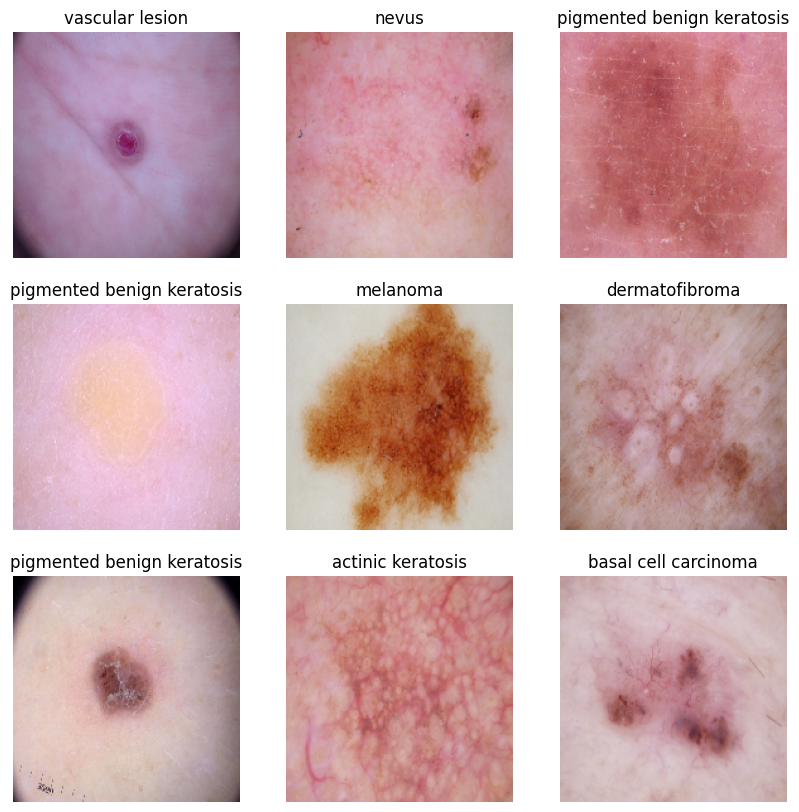

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

model = Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))
model.add(Conv2D(16,kernel_size=3,strides =(1,1),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32,kernel_size=3,strides =(1,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32,kernel_size=3,strides =(1,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64,kernel_size=3,strides =(1,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64,kernel_size=3,strides =(1,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(9,activation='softmax'))



### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
optimizer = 'adam'
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        9

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 632s 3s/step - loss: 2.0564 - accuracy: 0.2054 - val_loss: 2.0432 - val_accuracy: 0.2036
Epoch 2/20
56/56 [==============================] - 1s 18ms/step - loss: 1.9616 - accuracy: 0.2584 - val_loss: 1.8622 - val_accuracy: 0.2953
Epoch 3/20
56/56 [==============================] - 1s 18ms/step - loss: 1.8627 - accuracy: 0.3080 - val_loss: 1.7530 - val_accuracy: 0.3423
Epoch 4/20
56/56 [==============================] - 1s 18ms/step - loss: 1.6592 - accuracy: 0.3929 - val_loss: 1.5806 - val_accuracy: 0.4609
Epoch 5/20
56/56 [==============================] - 1s 18ms/step - loss: 1.5680 - accuracy: 0.4420 - val_loss: 1.7712 - val_accuracy: 0.4027
Epoch 6/20
56/56 [==============================] - 1s 18ms/step - loss: 1.5033 - accuracy: 0.4715 - val_loss: 1.4592 - val_accuracy: 0.4922
Epoch 7/20
56/56 [==============================] - 1s 18ms/step - loss: 1.4103 - accuracy: 0.5056 - val_loss: 1.3912 - val_accuracy: 0.5324
Epoch 8/20
56

### Visualizing training results

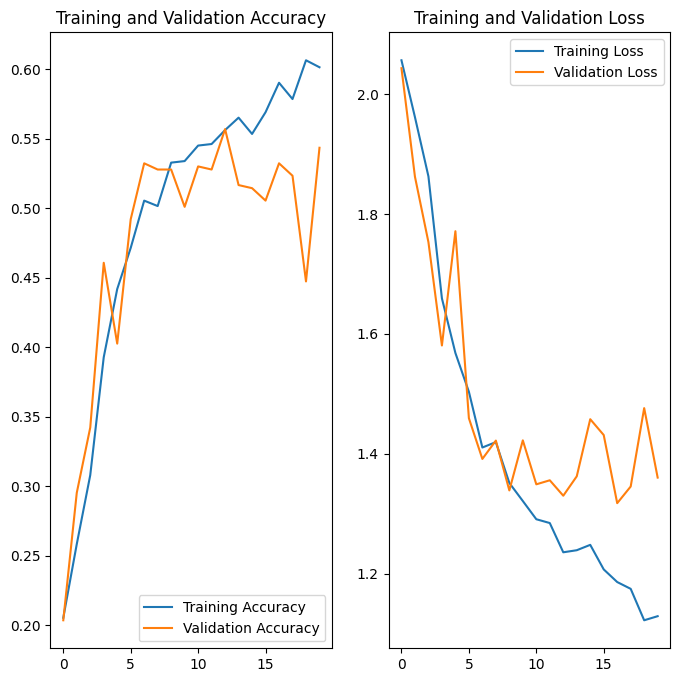

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Write your findings here

- As the number of epochs increases, the training accuracy increases gradually
- The validation accuracy however doesn't improve much after a few iterations 
- The final training accuracy is around 60% and the validation accuracy approx 54%.
- Since the training accuracy is higher than the validation accuracy, it indicates the an overfitting model. 

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

# Data augmentation is done with RandomFlip and RandomRotation
from tensorflow.keras.layers import RandomFlip, RandomRotation

data_augmentation = Sequential([
                                RandomFlip("horizontal_and_vertical",seed=123),
                                RandomRotation(0.2,seed=123)
])

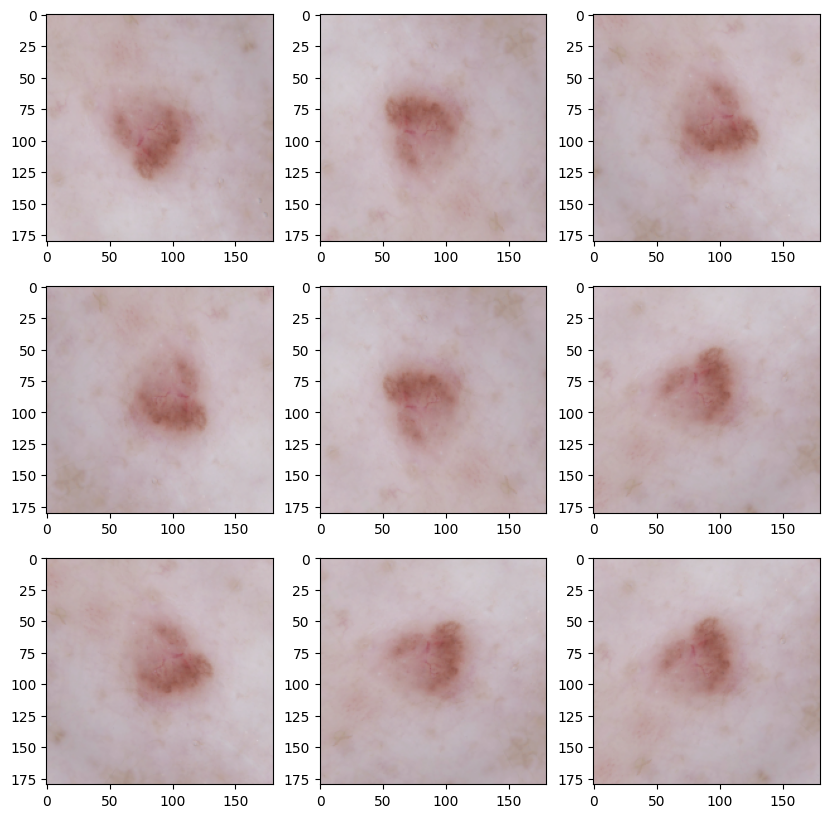

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        np.random.seed(i)
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
from tensorflow.keras.layers import Dropout

model2 = Sequential()
model2.add(keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))

model2.add(Conv2D(16,kernel_size=3,strides =(1,1),activation='relu',input_shape=(28,28,1)))
model2.add(MaxPool2D(pool_size=(2, 2)))

model2.add(Conv2D(32,kernel_size=3,strides =(1,1),activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Conv2D(32,kernel_size=3,strides =(1,1),activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))

model2.add(Conv2D(64,kernel_size=3,strides =(1,1),activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Conv2D(64,kernel_size=3,strides =(1,1),activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.35))

model2.add(Flatten())
model2.add(Dense(9,activation='softmax'))


### Compiling the model

In [ ]:
## Your code goes here
optimizer = 'adam'
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
model2.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs

epochs = 20
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 30ms/step - loss: 2.0677 - accuracy: 0.1853 - val_loss: 2.0309 - val_accuracy: 0.2215
Epoch 2/20
56/56 [==============================] - 1s 25ms/step - loss: 1.9879 - accuracy: 0.2299 - val_loss: 1.8674 - val_accuracy: 0.2796
Epoch 3/20
56/56 [==============================] - 1s 25ms/step - loss: 1.8371 - accuracy: 0.3086 - val_loss: 1.7135 - val_accuracy: 0.3758
Epoch 4/20
56/56 [==============================] - 1s 25ms/step - loss: 1.7225 - accuracy: 0.3599 - val_loss: 1.7241 - val_accuracy: 0.3736
Epoch 5/20
56/56 [==============================] - 1s 25ms/step - loss: 1.6965 - accuracy: 0.3884 - val_loss: 1.6673 - val_accuracy: 0.4139
Epoch 6/20
56/56 [==============================] - 1s 24ms/step - loss: 1.6879 - accuracy: 0.3940 - val_loss: 1.5792 - val_accuracy: 0.4497
Epoch 7/20
56/56 [==============================] - 1s 25ms/step - loss: 1.6653 - accuracy: 0.3917 - val_loss: 1.5634 - val_accuracy: 0.4541
Epoch 8/20
56

### Visualizing the results

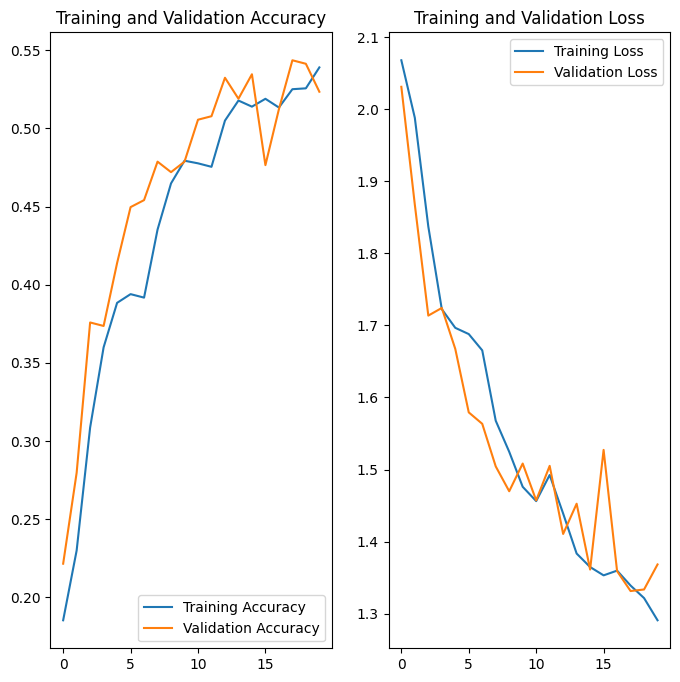

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

- After adding augmentaion and re-training the new model (model2), the overall peformance has improved. 
- It seems that the problem of overfitting is resolved as the validation accuracy is close to the training accuracy. However the overall accuracy remains a concern as it is still low. We might need to tune the hyper-parameters to improve the accuracy of the overall model.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
distribution = [len(list((data_dir_train.joinpath(name)).glob('*.jpg'))) for name in class_names]
cls_distribution = pd.DataFrame({'Class':class_names,'Count':distribution})

In [ ]:
cls_distribution

,Class,Count
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


<BarContainer object of 9 artists>

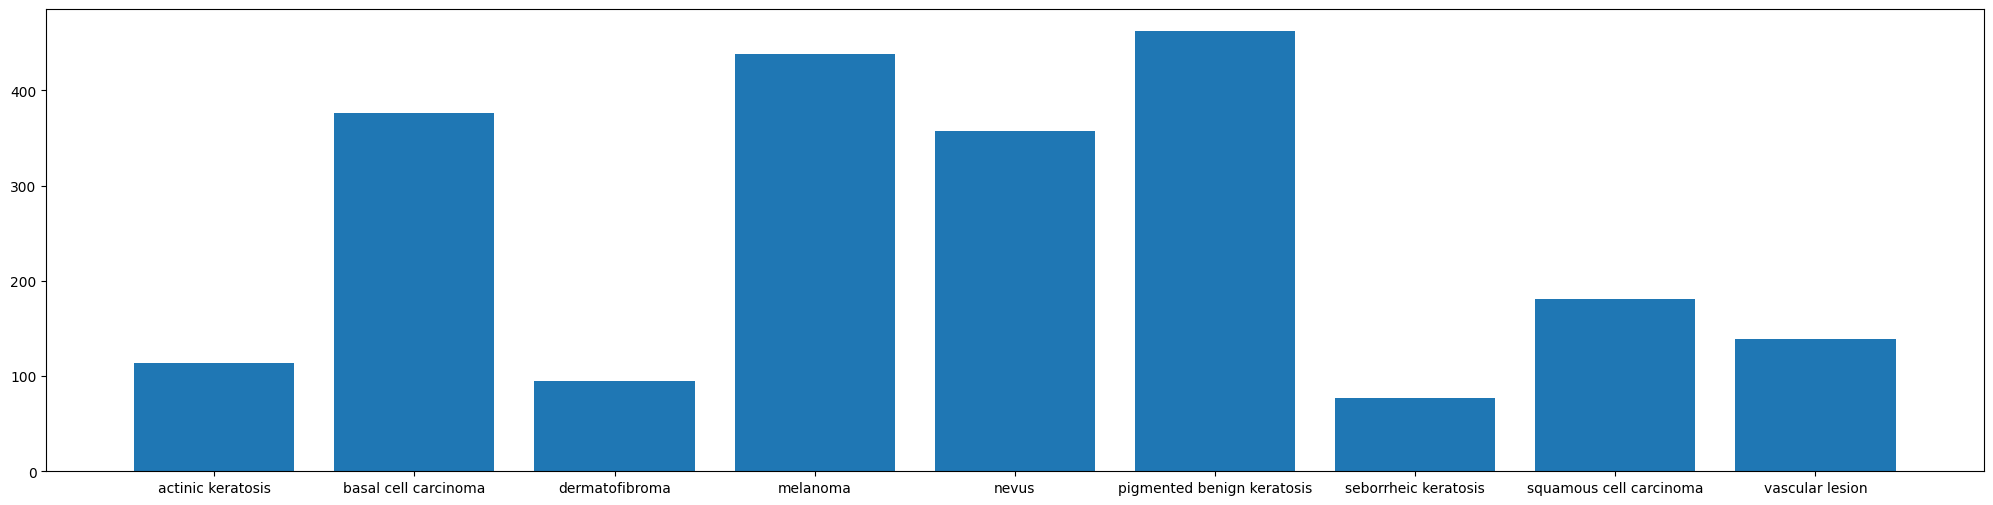

In [ ]:
plt.figure(figsize=(25,6))
plt.bar(class_names,distribution)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
- The least number of samples are for "*seborrheic keratosis*"
#### - Which classes dominate the data in terms proportionate number of samples?
- The other classes that have more data are for *pigmented benign keratosis*, *melanoma*,*basal cell carcinoma* and *nevus*.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset= data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset) +'/'+ i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF1100D6410>: 100%|██████████| 500/500 [00:30<00:00, 16.63 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF181F375B0>: 100%|██████████| 500/500 [00:30<00:00, 16.49 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF1A0170400>: 100%|██████████| 500/500 [00:24<00:00, 20.01 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FF181FA0310>: 100%|██████████| 500/500 [01:42<00:00,  4.90 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF1A289BC70>: 100%|██████████| 500/500 [01:48<00:00,  4.63 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF180BC3A30>: 100%|██████████| 500/500 [00:21<00:00, 23.19 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FF180B657E0>: 100%|██████████| 500/500 [00:53<00:00,  9.26 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF181F64220>: 100%|██████████| 500/500 [00:22<00:00, 22.40 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF181E26830>: 100%|██████████| 500/500 [00:25<00:00, 19.92 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Skin cancer assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026984.jpg_5c4cfa4f-0ba6-491b-854a-f41d5ef0ca35.jpg',
 '/content/gdrive/MyDrive/Skin cancer assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026457.jpg_16291b96-5262-4452-b3db-92f9d85c9ea6.jpg',
 '/content/gdrive/MyDrive/Skin cancer assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031506.jpg_7b67ad70-2064-40b8-b005-0c94c2190ca8.jpg',
 '/content/gdrive/MyDrive/Skin cancer assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033494.jpg_60f0d799-186b-45d8-a77e-001bcf12c28d.jpg',
 '/content/gdrive/MyDrive/Skin cancer assignment/Skin cancer ISIC The International 

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
dataframe_dict_new

{'/content/gdrive/MyDrive/Skin cancer assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026984.jpg_5c4cfa4f-0ba6-491b-854a-f41d5ef0ca35.jpg': 'actinic keratosis',
 '/content/gdrive/MyDrive/Skin cancer assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026457.jpg_16291b96-5262-4452-b3db-92f9d85c9ea6.jpg': 'actinic keratosis',
 '/content/gdrive/MyDrive/Skin cancer assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031506.jpg_7b67ad70-2064-40b8-b005-0c94c2190ca8.jpg': 'actinic keratosis',
 '/content/gdrive/MyDrive/Skin cancer assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033494.jpg_60f0d799-186b-45d8-a77e-001bcf12c28d.jpg': 'actinic keratosis',


In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])


In [ ]:
df2

,Path,Label
0,/content/gdrive/MyDrive/Skin cancer assignment...,actinic keratosis
1,/content/gdrive/MyDrive/Skin cancer assignment...,actinic keratosis
2,/content/gdrive/MyDrive/Skin cancer assignment...,actinic keratosis
3,/content/gdrive/MyDrive/Skin cancer assignment...,actinic keratosis
4,/content/gdrive/MyDrive/Skin cancer assignment...,actinic keratosis
...,...,...
4495,/content/gdrive/MyDrive/Skin cancer assignment...,seborrheic keratosis
4496,/content/gdrive/MyDrive/Skin cancer assignment...,seborrheic keratosis
4497,/content/gdrive/MyDrive/Skin cancer assignment...,seborrheic keratosis
4498,/content/gdrive/MyDrive/Skin cancer assignment...,seborrheic keratosis


In [ ]:
path_list_original = [x for x in data_dir_train.glob('*/*.jpg')]
lesion_list_original = [os.path.basename(os.path.dirname(y)) for y in data_dir_train.glob('*/*.jpg')]
original_df = pd.DataFrame(dict(Path=path_list_original, Label=lesion_list_original) ,columns = ['Path','Label'])

original_df


,Path,Label
0,/content/gdrive/MyDrive/Skin cancer assignment...,actinic keratosis
1,/content/gdrive/MyDrive/Skin cancer assignment...,actinic keratosis
2,/content/gdrive/MyDrive/Skin cancer assignment...,actinic keratosis
3,/content/gdrive/MyDrive/Skin cancer assignment...,actinic keratosis
4,/content/gdrive/MyDrive/Skin cancer assignment...,actinic keratosis
...,...,...
2234,/content/gdrive/MyDrive/Skin cancer assignment...,seborrheic keratosis
2235,/content/gdrive/MyDrive/Skin cancer assignment...,seborrheic keratosis
2236,/content/gdrive/MyDrive/Skin cancer assignment...,seborrheic keratosis
2237,/content/gdrive/MyDrive/Skin cancer assignment...,seborrheic keratosis


In [ ]:
new_df = original_df.append(df2)

<ipython-input-44-2ade1842133b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [ ]:
# Total count of base folder along wth output folders for each class
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here

model3 = Sequential()
model3.add(keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))

model3.add(Conv2D(16,kernel_size=3,strides =(1,1),activation='relu',input_shape=(28,28,1)))
model3.add(MaxPool2D(pool_size=(2, 2)))

model3.add(Conv2D(32,kernel_size=3,strides =(1,1),activation='relu'))
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Conv2D(32,kernel_size=3,strides =(1,1),activation='relu'))
model3.add(MaxPool2D(pool_size=(2, 2)))

model3.add(Conv2D(64,kernel_size=3,strides =(1,1),activation='relu'))
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Conv2D(64,kernel_size=3,strides =(1,1),activation='relu'))
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.35))

model3.add(Flatten())
model3.add(Dense(9,activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 43s 235ms/step - loss: 2.0093 - accuracy: 0.2196 - val_loss: 1.6736 - val_accuracy: 0.3556
Epoch 2/50
169/169 [==============================] - 36s 207ms/step - loss: 1.6491 - accuracy: 0.3522 - val_loss: 1.5549 - val_accuracy: 0.4172
Epoch 3/50
169/169 [==============================] - 36s 207ms/step - loss: 1.5448 - accuracy: 0.3900 - val_loss: 1.4514 - val_accuracy: 0.4373
Epoch 4/50
169/169 [==============================] - 40s 231ms/step - loss: 1.5001 - accuracy: 0.4201 - val_loss: 1.4642 - val_accuracy: 0.4432
Epoch 5/50
169/169 [==============================] - 39s 225ms/step - loss: 1.4211 - accuracy: 0.4432 - val_loss: 1.4475 - val_accuracy: 0.4581
Epoch 6/50
169/169 [==============================] - 36s 207ms/step - loss: 1.3883 - accuracy: 0.4642 - val_loss: 1.3302 - val_accuracy: 0.4833
Epoch 7/50
169/169 [==============================] - 38s 217ms/step - loss: 1.3471 - accuracy: 0.4811 - val_loss: 1.2956 - val_ac

#### **Todo:**  Visualize the model results

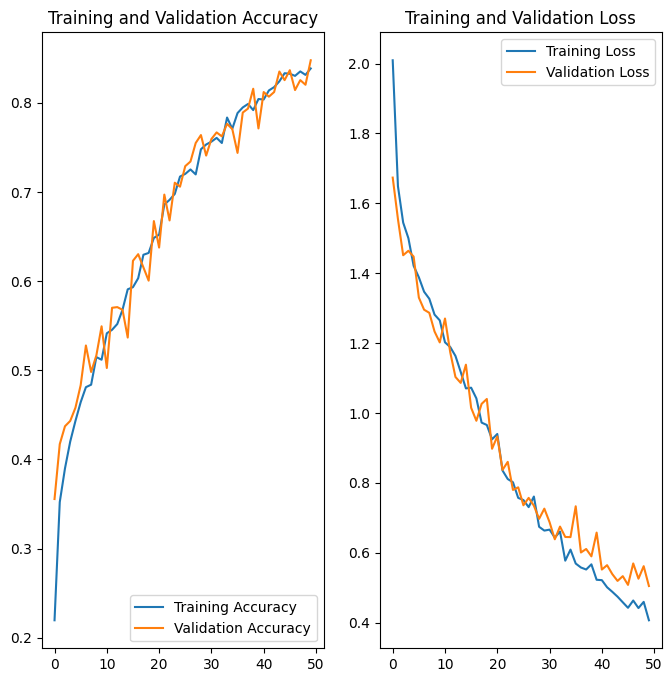

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
 
 - After using the augmented images along with the original data set to balance the different classes, it is seen that the overall accuracy has significantly improved to 84 % and the problem of overfitting/ underfitting is also resolved.
